In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/sasw/data/data1.zip
!unzip drive/MyDrive/sasw/data/data2.zip
!unzip drive/MyDrive/sasw/data/data3.zip

Archive:  drive/MyDrive/sasw/data/data1.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               
Archive:  drive/MyDrive/sasw/data/data2.zip
  inflating: Fake.csv                
  inflating: True.csv                
Archive:  drive/MyDrive/sasw/data/data3.zip
  inflating: fake_or_real_news.csv   


In [2]:
from DataLoader import DataLoader
from Model import Model

ROOT = "data/"
# datasets = ["data1", "data2", "data3"]
datasets = ["data3"]

dataset = DataLoader(ROOT, datasets)
dataset.dataset

Loading datasets...
Loading from: data/data3/fake_or_real_news.csv
Loaded: 65 rows

Total loaded 5 rows

Cleaning dataset...


  0%|          | 0/65 [00:00<?, ?it/s]/content/DataLoader.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean_words"][i] = self.Preprocess("{} {}".format(self.dataset["title"][i], self.dataset["text"][i]))
/content/DataLoader.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean"][i] = " ".join(self.dataset["clean_words"][i])
100%|██████████| 65/65 [00:00<00:00, 568.43it/s]

DATASET: train 0.7 test 0.3


,title,text,label,clean_words,clean
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[smell, hillary, fear, daniel, greenfield, shi...",smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[watch, exact, moment, paul, ryan, committed, ...",watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,"[kerry, paris, gesture, sympathy, secretary, s...",kerry paris gesture sympathy secretary state j...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[bernie, supporters, twitter, erupt, anger, tr...",bernie supporters twitter erupt anger tried wa...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,"[battle, york, primary, matters, primary, york...",battle york primary matters primary york runne...
...,...,...,...,...,...
60,Detroit women’s Halloween decorations depict ‘...,Print \n[Ed. – How to take the fun out of Hall...,0,"[detroit, women, halloween, decorations, depic...",detroit women halloween decorations depict rea...
61,Biden makes another surprise political stop,"On this day in 1973, J. Fred Buzhardt, a lawye...",1,"[biden, makes, surprise, political, stop, fred...",biden makes surprise political stop fred buzha...
62,Hillary Clinton's declining favorability numbe...,Buried beneath Wednesday's eye-popping headlin...,1,"[hillary, clinton, declining, favorability, nu...",hillary clinton declining favorability numbers...
63,Comment on Quid Pro Quo? Wikileaks Email Revea...,New Wikileaks email dumps have revealed massiv...,0,"[comment, quid, wikileaks, email, reveals, cli...",comment quid wikileaks email reveals clinton c...


In [2]:
for i,doc in enumerate(dataset.train_sequences[:2]):
     print("The padded encoding for document",i+1," is : ",doc[:100])

The padded encoding for document 1  is :  [ 664  665  115  245  664  665  115  245  246  207  245  245   52  664
  665  115  245  178  901 2196  155  902  115  245  903 2197  247  904
 2198 1349 1350 2199  116  179 2200  905  248 2201   57  249   79   84
 2202 2203  906 2204  907 1351  503  102   69  156   79   84  180 1352
   70  504   85  102  331  666  208  209 2205 1353 2206  117   85  210
   34  667   79  249  283  181  908  208  909  182  250  115 2207  157
  183  331  249   79   84  408 1354  183  409 2208  505  910   52   79
   84 1355]
The padded encoding for document 2  is :  [   8    2  257  341 2254  215  216    8    2   71  215  216  416  116
   80  677    9  925  133    6  926  514  678  342   17  515   43  927
   10    6  417  134   12   18   81 2255   81    2  258   92    7   71
  416 1384  679  680 2256 2257  928  217    2  516  681   46   80  929
  215  216  116   10   53    1  930 1385 2258  186   10 2259    2 2260
 2261  215  216  418 1386  419  682 2262  342  930  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model spawned
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         758656    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,054,849
Trainable params: 1,054,849
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 15s 15s/step - loss: 0.6933 - acc: 0.4722 - val_loss: 0.6

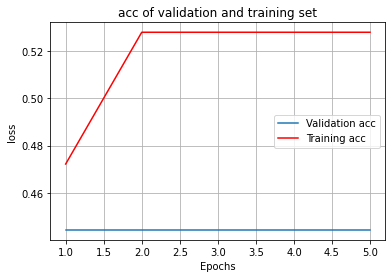

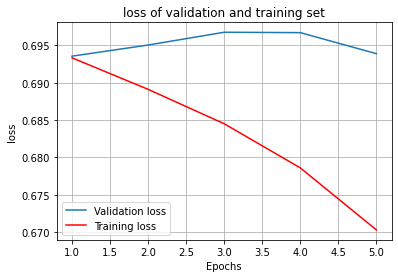

In [4]:
TRAIN_ID = 1
PLOT_DIR = "drive/MyDrive/sasw/figs/"
EPOCHS = 5
LR = 0.001

model = Model(dataset, lr=LR)
model.Train(EPOCHS)
model.PlotScore("acc", "{}{}{}{}".format(PLOT_DIR, "acc_", TRAIN_ID, ".png"))
model.PlotScore("loss", "{}{}{}{}".format(PLOT_DIR, "loss_", TRAIN_ID, ".png"))

Model Accuracy: 0.5


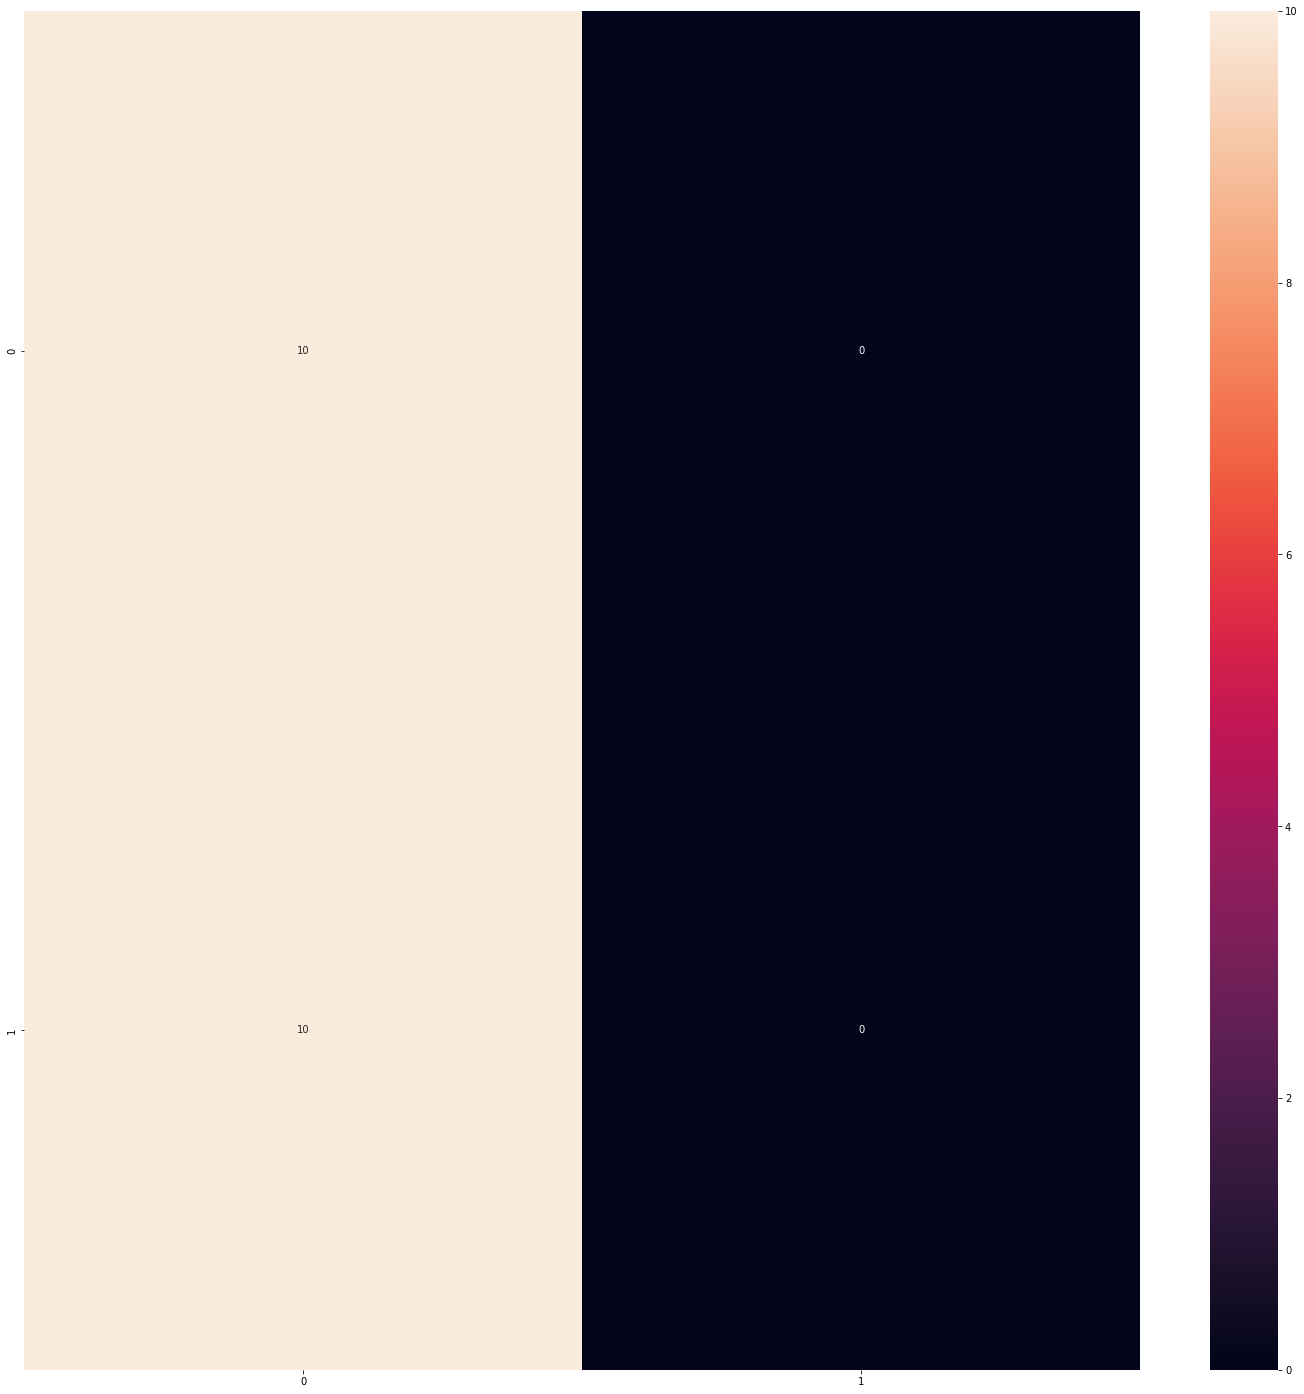

In [5]:
model.Predict(None)